THIS CODE PROVIDES INSIGHTS IN USING SIMPLE METHODS FOR DATA ASSIMILATION

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining the sample observational data (observations) and sample model predictions (model_output) as NumPy arrays.
observations = np.array([15.2, 16.1, 14.5, 15.8, 25.0])
model_output = np.array([14.8, 15.5, 14.0, 16.0, 25.3])

TWO METHODS WOULD BE UTILIZED FOR THE DATA ASSIMILATION

OPTIMAL INTERPOLATION AND KALMAN FILTER

In [14]:
#OPTIMAL INTERPOLATION: A statistical method that combines observation and model output to estimate the state of the atmosphere.
# Optimal interpolation uses weights based on the estimated error covariances of the observation and the model

#define the function and calculate errors in the datasets

def optimal_interpolation(observations, model_output):
    obs_error = np.var(observations)
    model_error = np.var(model_output)

 # Calculate the weights for observations and model output
    w_obs = model_error / (obs_error + model_error)
    w_model = obs_error / (obs_error + model_error)

# Calculate the analysis field
    analysis = w_obs * observations + w_model * model_output

    return analysis, obs_error, model_error


# Perform optimal interpolation
analysis, obs_error, model_error = optimal_interpolation(observations, model_output)



# Calculate the root mean square error (RMSE) and bias in the datasets
rmse_analysis = np.sqrt(np.mean((observations - analysis) ** 2))
rmse_model = np.sqrt(np.mean((observations- model_output ) ** 2))
bias_analysis = np.mean(observations - analysis)
bias_model = np.mean(observations- model_output )

#Printing the results

print("OBSERVATION:", observations)
print("MODEL OUTPUT:", model_output)
print("Analysis field:", analysis)



print("RMSE (ANALYSIS):", rmse_analysis)
print("RMSE (model):", rmse_model)
print("Bias (ANALYSIS):", bias_analysis)
print("Bias (model):", bias_model)


OBSERVATION: [15.2 16.1 14.5 15.8 25. ]
MODEL OUTPUT: [14.8 15.5 14.  16.  25.3]
Analysis field: [15.01325588 15.81988382 14.26656985 15.89337206 25.14005809]
RMSE (ANALYSIS): 0.19807204697312247
RMSE (model): 0.4242640687119287
Bias (ANALYSIS): 0.09337205838546332
Bias (model): 0.2


COMPARISON OF THE OUTPUT

The comparison between the model output and the analysis field shows significant improvements due to the data assimilation process:

Reduced RMSE: The RMSE for the analysis field (0.198) is less than half of the RMSE for the model output (0.424), indicating a substantial improvement in accuracy.

Reduced Bias: The bias for the analysis field (0.093) is less than half of the bias for the model output (0.2), indicating a better alignment with the observations.

These improvements demonstrate the effectiveness of the optimal interpolation in combining observational data with model predictions to produce a more accurate and reliable estimate of the atmospheric state.

VISUALIZATION

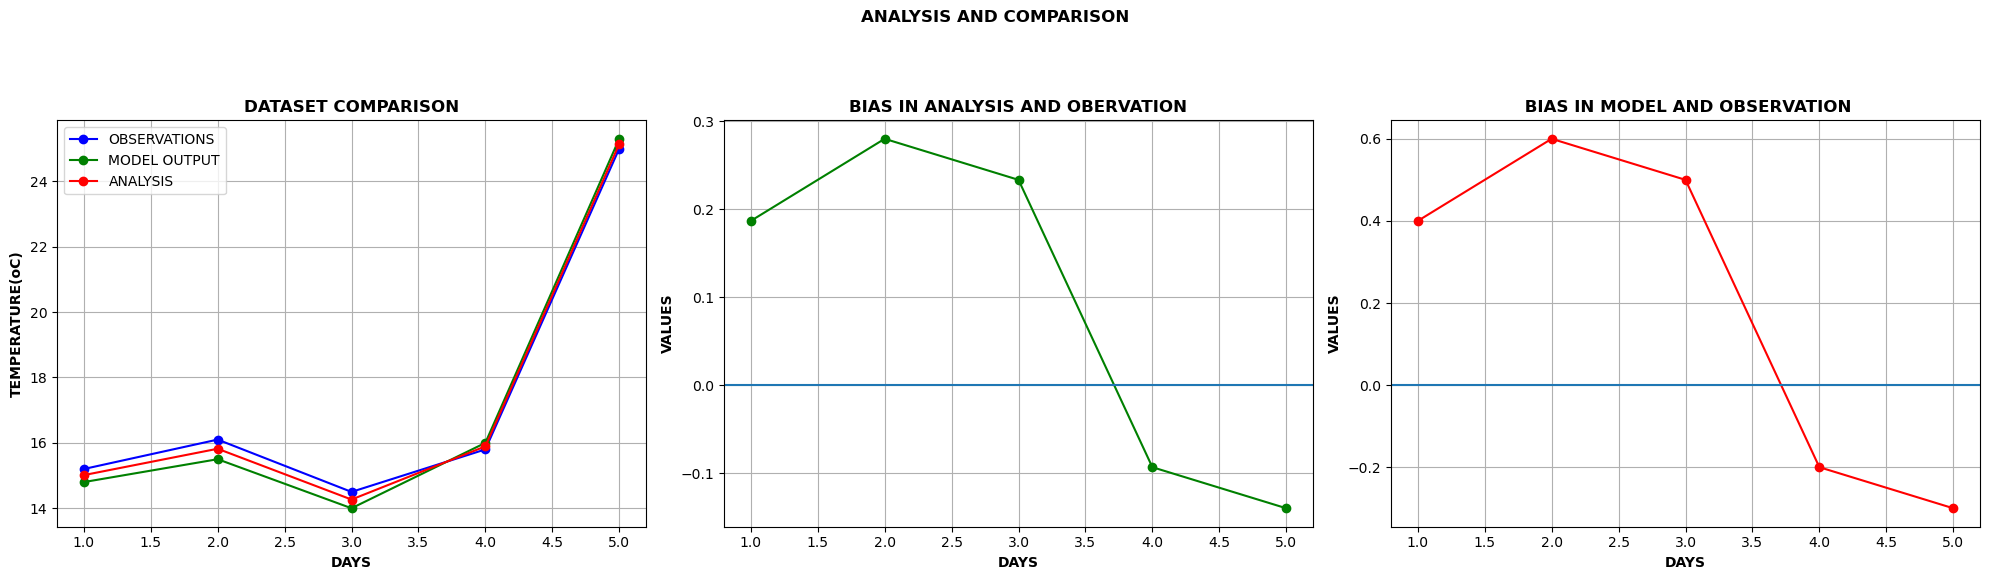

In [36]:
#VISUALIZATION

analysis_bias= observations - analysis
model_bias=  observations -  model_output

days= [1,2,3,4,5]

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Flatten the axs array for easy indexing
axs = axs.flatten()

# Plot for all
axs[0].plot(days, observations, label='OBSERVATIONS', color='b',marker='o')
axs[0].plot(days, model_output, label='MODEL OUTPUT', color='g',marker='o')
axs[0].plot(days, analysis, label='ANALYSIS', color='r',marker='o')
axs[0].set_title('DATASET COMPARISON', fontweight='bold')
axs[0].set_ylabel('TEMPERATURE(oC)', fontweight='bold')
axs[0].set_xlabel('DAYS', fontweight='bold')
axs[0].legend()
axs[0].grid(True)

# Plot bias 1
axs[1].plot(days, analysis_bias, label='ANALYSIS BIAS', color='g',marker='o')
axs[1].set_title('BIAS IN ANALYSIS AND OBERVATION', fontweight='bold')
axs[1].set_xlabel('DAYS', fontweight='bold')
axs[1].set_ylabel('VALUES', fontweight='bold')
axs[1].axhline(0)
axs[1].grid(True)

# Plot bias 2
axs[2].plot(days, model_bias, label='MODEL BIAS', color='r',marker='o')
axs[2].set_title(' BIAS IN MODEL AND OBSERVATION', fontweight='bold')
axs[2].set_xlabel('DAYS', fontweight='bold')
axs[2].set_ylabel('VALUES', fontweight='bold')
axs[2].axhline(0)
axs[2].grid(True)






# Adjust layout and save the figure
plt.tight_layout()
fig.suptitle('ANALYSIS AND COMPARISON', fontweight='bold', y=1.15)
fig.savefig('assimilation', bbox_inches='tight', dpi=500)
plt.show()




DISCUSION

The analysis field is much closer to the observations compared to the model output, demonstrating reduced errors and bias. 

Graphs confirm that the analysis aligns more closely with observed data, showing the effectiveness of the Optimal interpolation in enhancing model accuracy by integrating observational data.

FOR KALMAN FILTER

This method essentially implements a simplified form of the Kalman Filter method known as the Kalman Gain method.


It computes the Kalman gain and then updates the model output using the observation, weighted by the Kalman gain. 

The resulting resulting analysis field provides an improved estimate of the atmospheric state by combining both

In [38]:
#Compute the Observation Matrix (H): Calculate the observation matrix (H) by dividing each element of the model_output array by the corresponding element of the observations array.
H = model_output/observations 


#Compute Covariance Matrices: Calculate the covariance matrices for the model predictions (model_covariance) and observations (observations_covariance) using the `np.cov()` function.
model_covariance = np.cov(model_output)
observations_covariance = np.cov(observations)


# (K): Calculation of  the Kalman gain (K) using the formula
K = model_covariance * H.T * (H * model_covariance * H.T +  observations) ** -1

#Combining the Observation and Model Output using the Kalman gain
Analysis = model_output + K * (observations - model_output)


#calculating statistical methods

rmse_analysis_kf = np.sqrt(np.mean((observations - Analysis) ** 2))
rmse_model_kf = np.sqrt(np.mean((observations- model_output ) ** 2))
bias_analysis_kf = np.mean(observations - Analysis)
bias_model_kf = np.mean(observations- model_output )

#Printing the results

print("OBSERVATION:", observations)
print("MODEL OUTPUT:", model_output)
print("Analysis field:", Analysis)



print("RMSE (ANALYSIS):", rmse_analysis_kf)
print("RMSE (model):", rmse_model_kf)
print("Bias (ANALYSIS):", bias_analysis_kf)
print("Bias (model):", bias_model_kf)

OBSERVATION: [15.2 16.1 14.5 15.8 25. ]
MODEL OUTPUT: [14.8 15.5 14.  16.  25.3]
Analysis field: [15.03521857 15.84455227 14.30034174 15.88500017 25.16125456]
RMSE (ANALYSIS): 0.18193292385350326
RMSE (model): 0.4242640687119287
Bias (ANALYSIS): 0.07472653802374048
Bias (model): 0.2


DISCUSSION

Like the Optimal interpolation


The analysis field is much closer to the observations compared to the model output, demonstrating reduced errors and bias.

These improvements highlight the effectiveness of the Kalman Filter in enhancing the model output by integrating observational data, resulting in more accurate and trustworthy atmospheric state estimates.